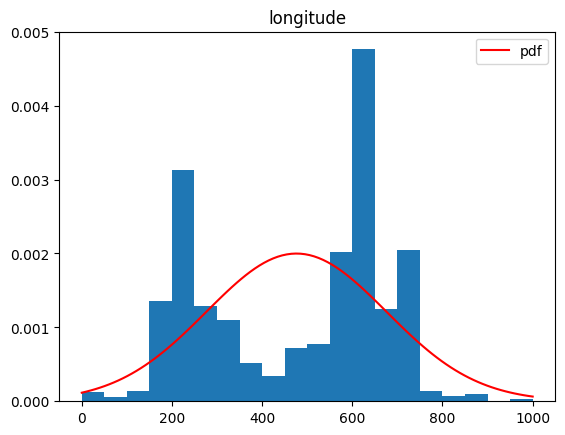

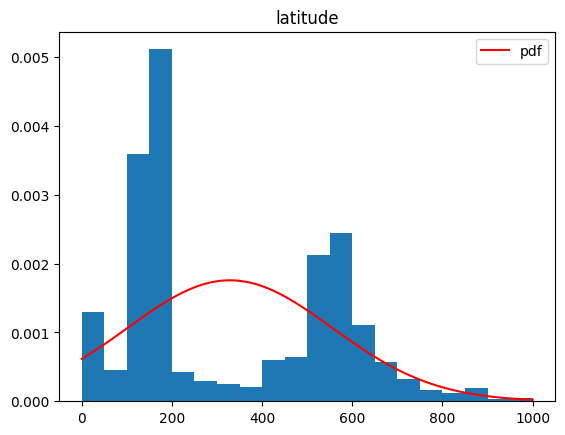

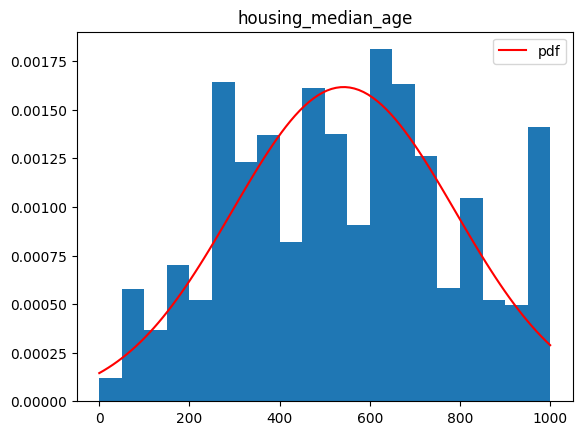

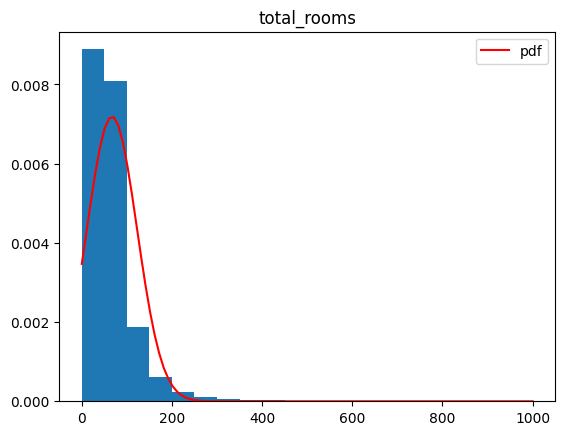

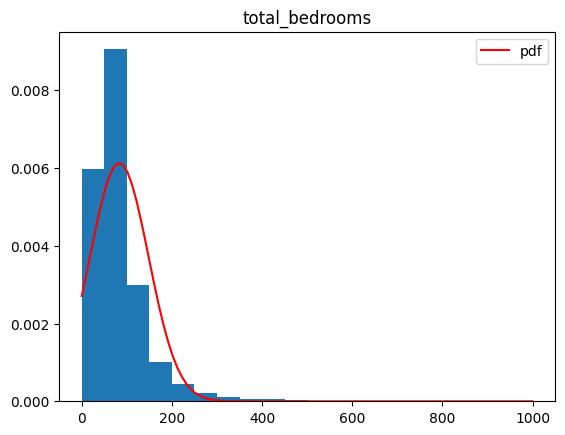

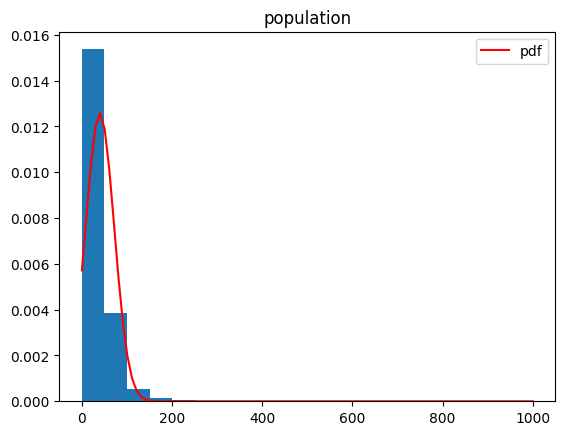

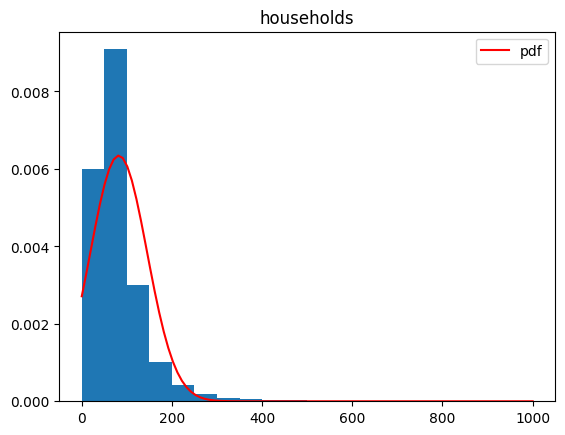

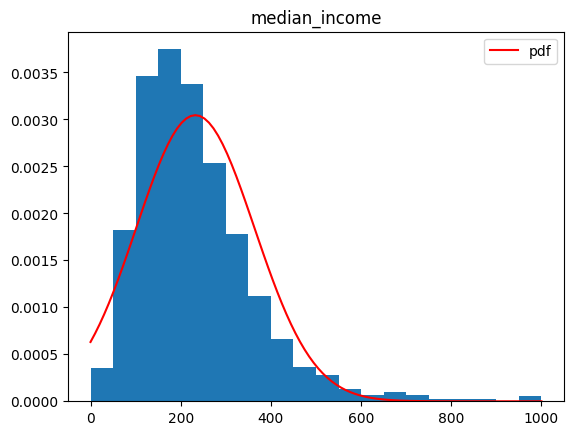

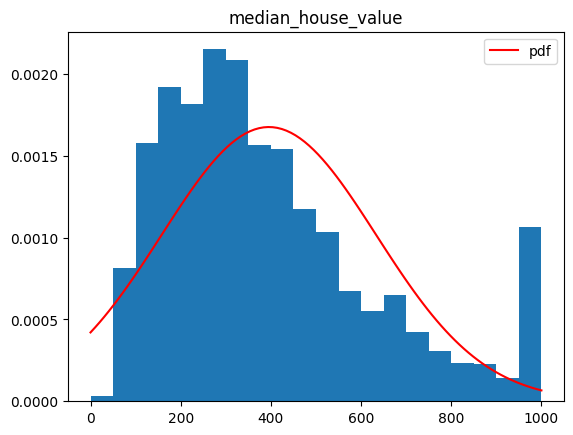

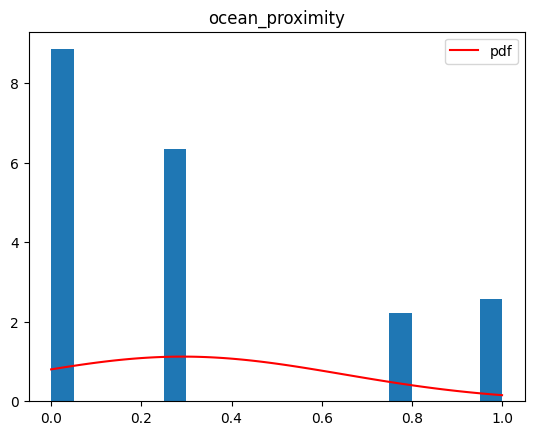

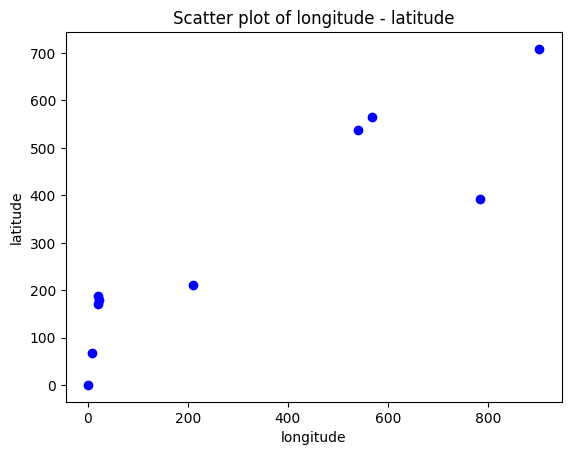

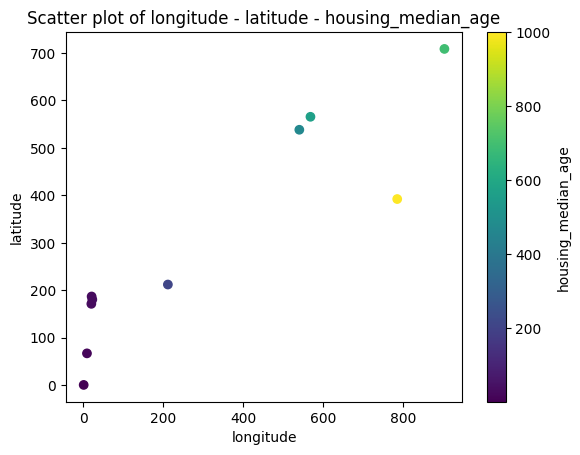

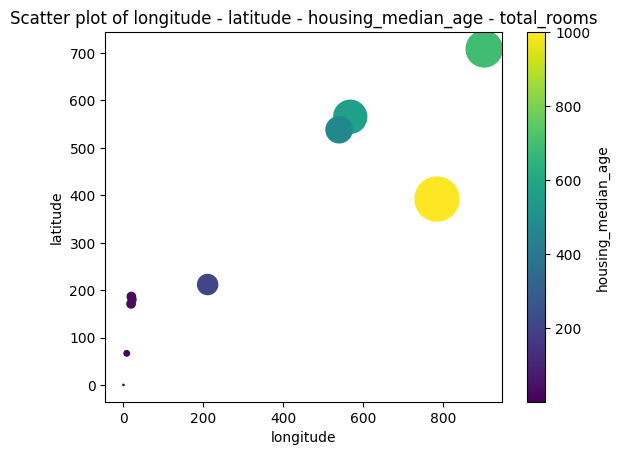

In [1]:
# Dimitris Stylianou P20004
# Panagiota Nicolaou P20009
# Anastasios Baikas P20131

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def load_data(): # Load data from csv file.
    data = pd.read_csv(r'C:\\Users\\dimit\\Desktop\\Anagnwrish_Protypwn_2022-2023\\housing.csv') # absolute path
    #data = pd.read_csv(r'housing.csv') # relative path
    return data

def normalize_data(data): # normalize data to range [0, 1000].
    return MinMaxScaler((0,1000)).fit_transform(data)

def plot_pdf_histograms(data_for_pdf_plot, data_columns_names): # Plot pdf histograms.
    for i in range(data_for_pdf_plot.shape[1]):
        column = data_for_pdf_plot[:, i]
        x = np.linspace(column.min(), column.max(), 100)
        y = stats.norm.pdf(x, np.mean(column), np.std(column))
        plt.hist(column, bins=20, density=True)
        plt.plot(x, y, '-r', label='pdf')
        plt.legend()
        plt.title(data_columns_names[i])
        plt.show()

def _2d_scatter_plot_with_2_attributes(data_columns_names, data_columns_values): # Plot 2d scatter plot with 2 attributes.
    x = data_columns_values[0] # attribute 1
    y = data_columns_values[1] # attribute 2
    plt.scatter(x, y, c='blue')
    plt.xlabel(data_columns_names[0])
    plt.ylabel(data_columns_names[1])
    title = 'Scatter plot of {} - {}'.format(data_columns_names[0], data_columns_names[1])
    plt.title(title)
    plt.show()

def _2d_scatter_plot_with_3_attributes(data_columns_names, data_columns_values): # Plot 2d scatter plot with 3 attributes.
    x = data_columns_values[0] # attribute 1
    y = data_columns_values[1] # attribute 2
    color = data_columns_values[2] # attribute 3
    color_label = data_columns_names[2]
    cmap_value = 'viridis'
    plt.scatter(x, y, c=color, cmap=cmap_value)
    plt.xlabel(data_columns_names[0])
    plt.ylabel(data_columns_names[1])
    plt.colorbar(label=color_label)
    title = 'Scatter plot of {} - {} - {}'.format(data_columns_names[0], data_columns_names[1], color_label)
    plt.title(title)
    plt.show()
    
def _2d_scatter_plot_with_4_attributes(data_columns_names, data_columns_values): # Plot 2d scatter plot with 4 attributes.
    x = data_columns_values[0] # attribute 1
    y = data_columns_values[1] # attribute 2
    color = data_columns_values[2] # attribute 3
    size = data_columns_values[3] # attribute 4
    color_label = data_columns_names[2]
    cmap_value = 'viridis'
    plt.scatter(x, y, c=color, cmap=cmap_value, s=size)
    plt.xlabel(data_columns_names[0])
    plt.ylabel(data_columns_names[1])
    plt.colorbar(label=color_label)
    title = 'Scatter plot of {} - {} - {} - {}'.format(data_columns_names[0], data_columns_names[1], color_label, data_columns_names[3])
    plt.title(title)
    plt.show()

if __name__ == '__main__':
    data = load_data()
    data_columns_names = list(data.columns)
    numerical_data = data.drop("ocean_proximity", axis=1)
    categorical_data = data["ocean_proximity"]
    
    # Replace categorical values with numerical values.
    categorical_data_encoded = data['ocean_proximity'].replace({'<1H OCEAN': 0, 'INLAND': 0.25, 'ISLAND': 0.5,'NEAR BAY': 0.75, 'NEAR OCEAN':1 })
    
    numerical_data = numerical_data.fillna(numerical_data.median()) # Fill missing values with median.
    normalized_numerical_data = normalize_data(np.array(numerical_data)) # Normalize numerical data.
    
    data_for_pdf_plot = []
    for x in list(normalized_numerical_data): # Add numerical data to the data_for_pdf_plot list.
        data_for_pdf_plot.append(x.tolist())
    
    temp_categorical_data_encoded = list(categorical_data_encoded)
    for x in data_for_pdf_plot: # Add categorical data to the data_for_pdf_plot list.
        x.append(temp_categorical_data_encoded.pop(0))
        
    data_for_pdf_plot = np.array(data_for_pdf_plot) # Convert data_for_pdf_plot list to numpy array.
    plot_pdf_histograms(data_for_pdf_plot, data_columns_names) # Plot pdf histograms.

    # Convert normalized_numerical_data[i] to list and add them to data_columns_values list.
    data_columns_values = [x.tolist() for x in normalized_numerical_data]
    
    # Convert categorical_data_encoded to list and add them to temp_categorical_data_encoded list.
    temp_categorical_data_encoded = [x for x in categorical_data_encoded.tolist()]
    for values in data_columns_values: # Add categorical data to data_columns_values list.
        values.append(temp_categorical_data_encoded.pop(0))    

    # Plot 2d scatter plot with 2 attributes, 3 attributes and 4 attributes.
    _2d_scatter_plot_with_2_attributes(data_columns_names, data_columns_values)
    _2d_scatter_plot_with_3_attributes(data_columns_names, data_columns_values)
    _2d_scatter_plot_with_4_attributes(data_columns_names, data_columns_values)